# Imports and Importing Dataset

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Dataset found on Kaggle: https://www.kaggle.com/datasets/camnugent/california-housing-prices/

In [2]:
housing = pd.read_csv('housing.csv')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing.shape

(20640, 10)

# Data PreProcessing

## Data Cleaning

In [6]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

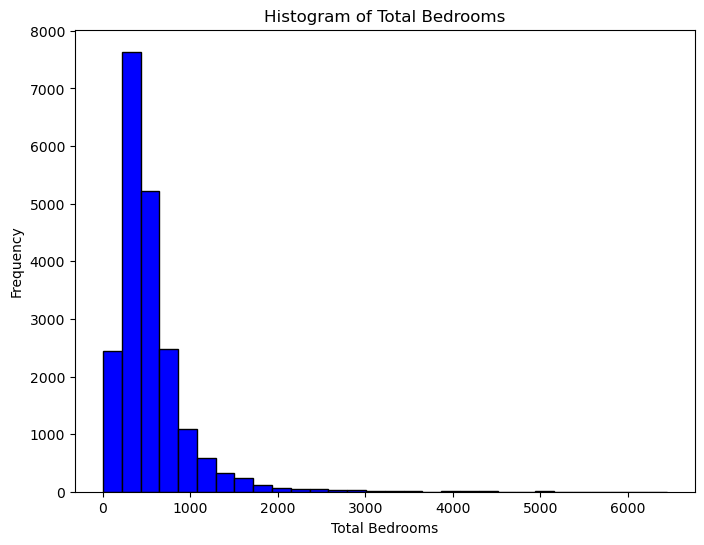

In [9]:
# visualization of total bedrooms in histogram
plt.figure(figsize = (8,6))
plt.hist(housing['total_bedrooms'], bins = 30, color = 'blue', edgecolor = 'black')
plt.title('Histogram of Total Bedrooms')
plt.xlabel("Total Bedrooms")
plt.ylabel('Frequency')
plt.show()

0


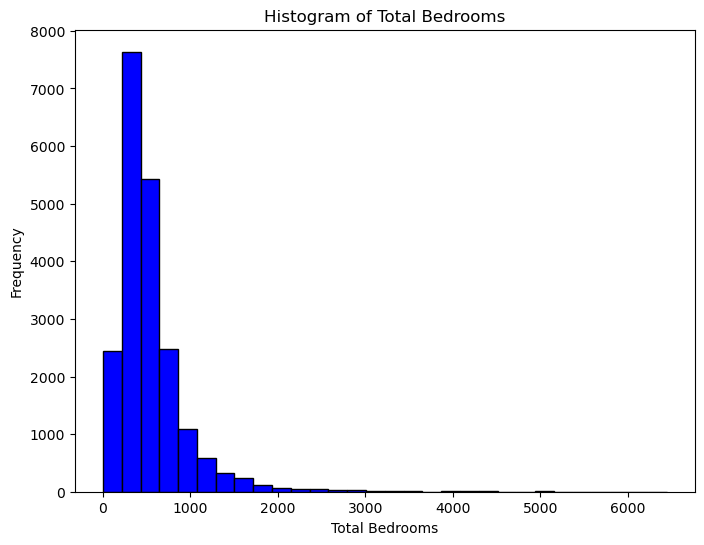

In [17]:
# replace missing values of total_bedrooms with median since skewed
housing['total_bedrooms'].fillna(housing['total_bedrooms'].median(), inplace=True)

# verify that missing values have been replaced
print(housing['total_bedrooms'].isna().sum())

# check to see distribution is the same
plt.figure(figsize= (8,6))
plt.hist(housing['total_bedrooms'], bins = 30, color = 'blue', edgecolor = 'black')
plt.title("Histogram of Total Bedrooms")
plt.xlabel("Total Bedrooms")
plt.ylabel('Frequency')
plt.show()

### Visualizations

In [27]:
# unique characters of ocean proximity
ocean_counts = housing['ocean_proximity'].value_counts()
print(ocean_counts)

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64


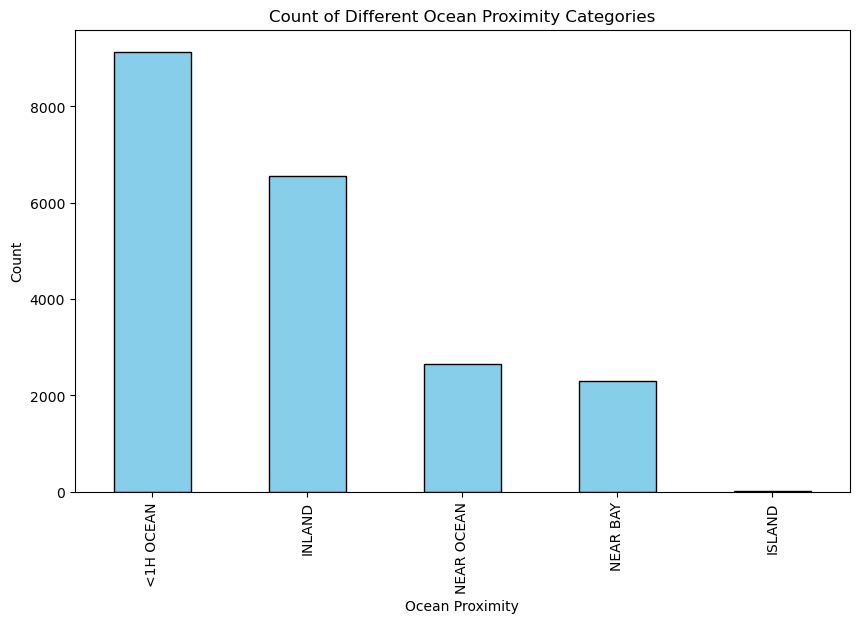

In [28]:
# bar plot of ocean proximity
plt.figure(figsize=(10,6))
ocean_counts.plot(kind = 'bar', color = 'skyblue', edgecolor = 'black')
plt.title('Count of Different Ocean Proximity Categories')
plt.xlabel('Ocean Proximity')
plt.ylabel('Count')
plt.show()

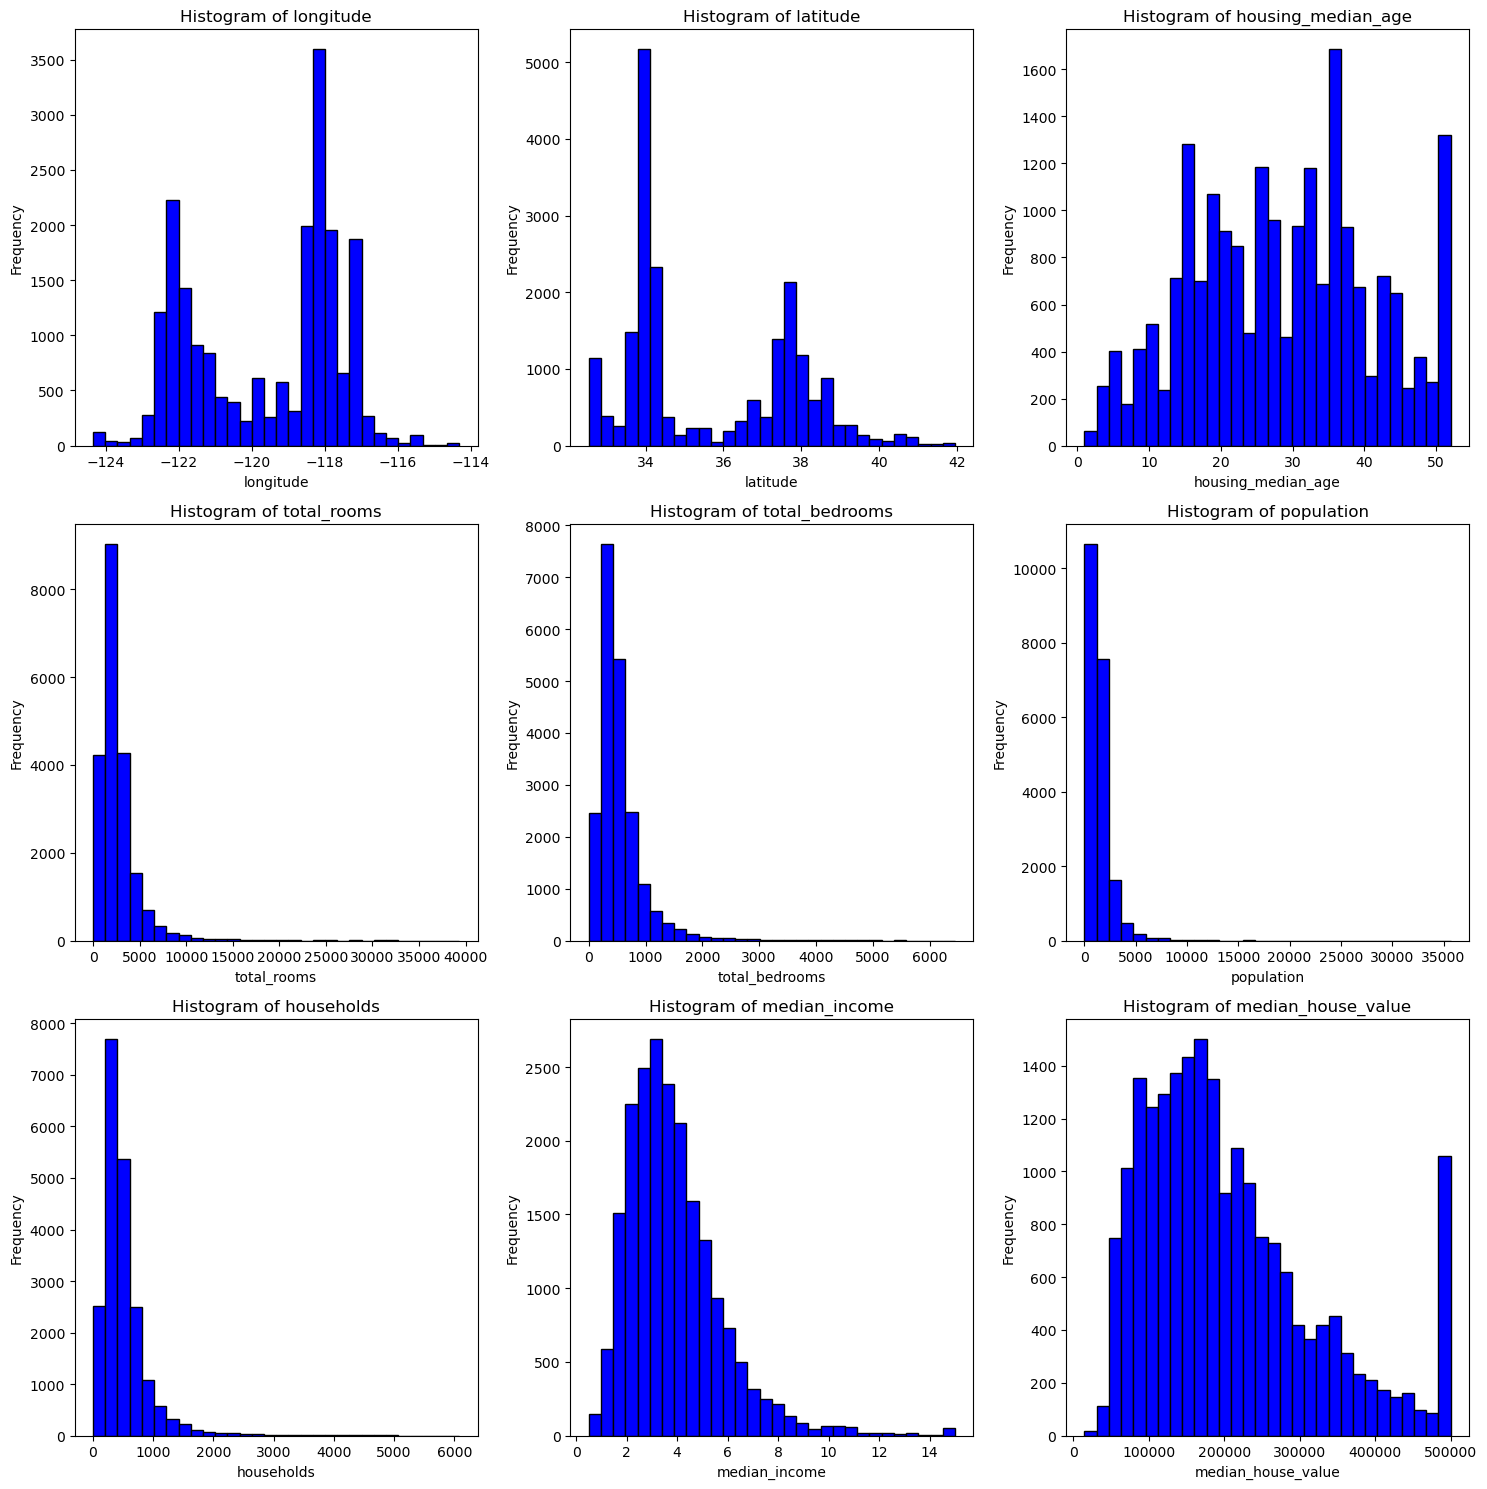

In [25]:
numeric_columns = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']

plt.figure(figsize = (15,15))
for column in numeric_columns:
    plt.subplot(3,3, list(housing.columns).index(column) + 1)
    plt.hist(housing[column], bins = 30, color = 'blue', edgecolor = 'black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()